In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set_theme()

In [3]:
vg = pd.read_csv('top100videogamesales.csv')
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


# Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

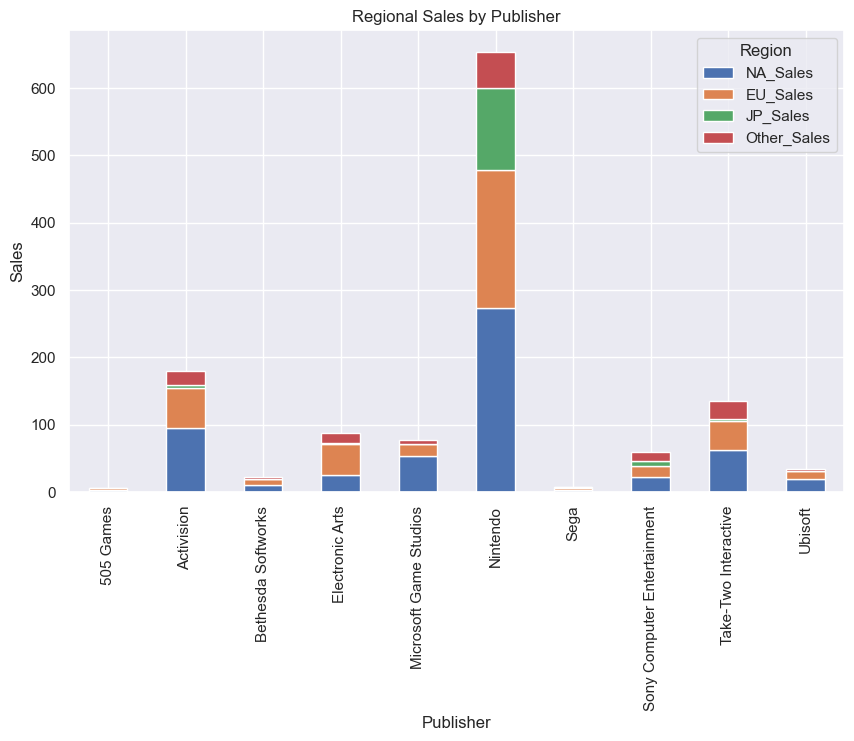

In [24]:
sales_by_publisher = vg.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_by_publisher.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Regional Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.legend(title='Region')

plt.show()

# Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

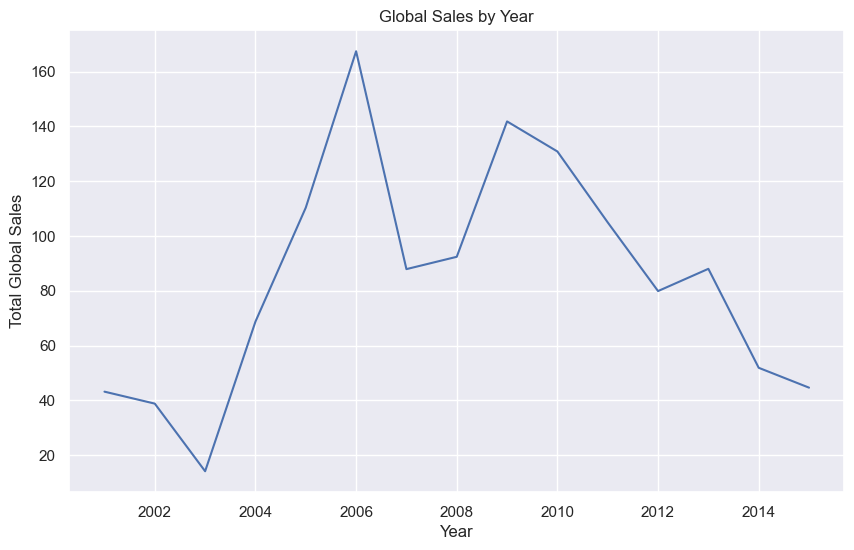

In [11]:
global_sales_by_year = vg.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=global_sales_by_year.index, y=global_sales_by_year.values)

plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales')

plt.show()

# Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

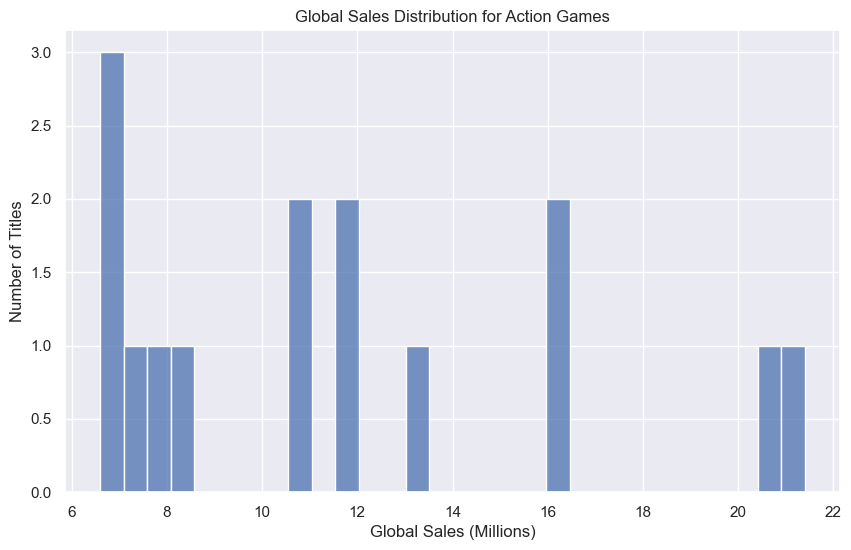

In [22]:
action_games = vg[vg['Genre'] == 'Action']

plt.figure(figsize=(10, 6))
sns.histplot(action_games['Global_Sales'], kde=False, bins=30)

plt.title('Global Sales Distribution for Action Games')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Number of Titles')

plt.show()

# North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

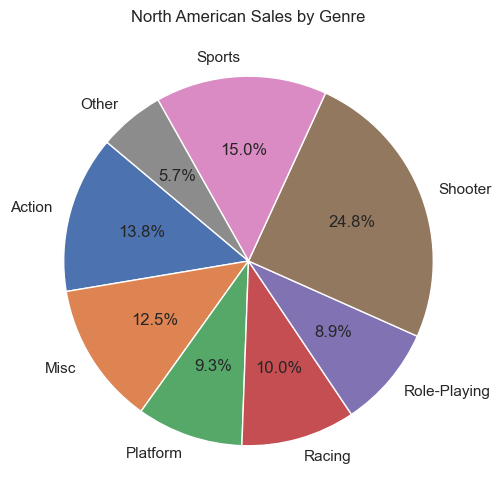

Genres included in the 'Other' category with their respective percentages of total NA sales: Fighting: 2.5%, Puzzle: 0.6%, Simulation: 2.6%


In [28]:
na_sales_by_genre = vg.groupby('Genre')['NA_Sales'].sum()
total_na_sales = na_sales_by_genre.sum()

threshold = 0.05 * na_sales_by_genre.sum()
small_categories = na_sales_by_genre[na_sales_by_genre < threshold]
na_sales_by_genre = na_sales_by_genre[na_sales_by_genre >= threshold]
na_sales_by_genre['Other'] = small_categories.sum()

plt.figure(figsize=(10, 6))
plt.pie(na_sales_by_genre, labels=na_sales_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.title('North American Sales by Genre')

plt.show()

other_percentages = (small_categories / total_na_sales) * 100
other_details = ', '.join([f'{genre}: {percent:.1f}%' for genre, percent in other_percentages.items()])

print(f"Genres included in the 'Other' category with their respective percentages of total NA sales: {other_details}")

# European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

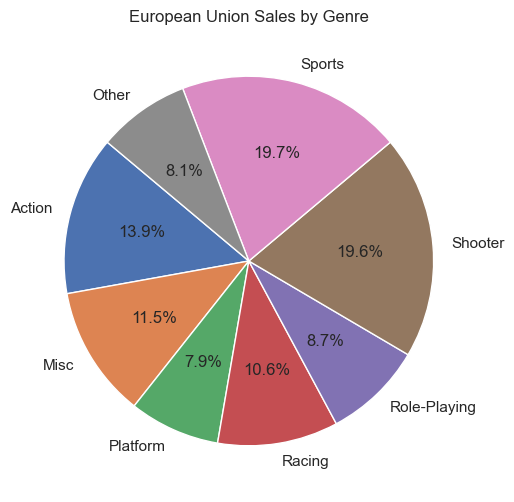

Genres included in the 'Other' category with their respective percentages of total EU sales: Fighting: 0.9%, Puzzle: 0.9%, Simulation: 4.1%


In [31]:
eu_sales_by_genre = vg.groupby('Genre')['EU_Sales'].sum()
total_eu_sales = eu_sales_by_genre.sum()

threshold = 0.056 * eu_sales_by_genre.sum()
small_categories = eu_sales_by_genre[eu_sales_by_genre < threshold]
eu_sales_by_genre = eu_sales_by_genre[eu_sales_by_genre >= threshold]
eu_sales_by_genre['Other'] = small_categories.sum()

plt.figure(figsize=(10, 6))
plt.pie(eu_sales_by_genre, labels=eu_sales_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.title('European Union Sales by Genre')

plt.show()

other_percentages = (small_categories / total_na_sales) * 100
other_details = ', '.join([f'{genre}: {percent:.1f}%' for genre, percent in other_percentages.items()])

print(f"Genres included in the 'Other' category with their respective percentages of total EU sales: {other_details}")

# Explain differences and similarities between the North American and European charts in markdown.

# Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.